*Reva Bharara*

*Email : revabharara@gmail.com*

*Linkedin : https://www.linkedin.com/in/reva-bharara-a83a78241/*


### Objective: To make a movie recommendation system based on:
#### 1. Content based filtering
#### 2. Popularity based filtering

### *Index:*
1. Importing the dependencies
2. Importing relevant datasets
3. Data exploration
4. Data preprocessing
5. Content based recommendation system
6. Popularity based recommendation system
7. Conclusion
8. Credits

### --------------------------------------------------------------------------------------------------------
### *1. Importing the dependencies*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import difflib
from sklearn.metrics.pairwise import cosine_similarity

### --------------------------------------------------------------------------------------------------------
### *2. Importing relevant datasets*

In [3]:
# creating a dataframe from the movies csv
df_movies=pd.read_csv('movies.csv')

### --------------------------------------------------------------------------------------------------------
### *3. Data exploration*
In this section we will explore the datasets and figure out its features and characteristics.

In [4]:
df_movies.head()

index     budget                                    genres  \
0      0  237000000  Action Adventure Fantasy Science Fiction   
1      1  300000000                  Adventure Fantasy Action   
2      2  245000000                    Action Adventure Crime   
3      3  250000000               Action Crime Drama Thriller   
4      4  260000000          Action Adventure Science Fiction   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  culture clash future space war space colony so...                en   
1  ocean drug abuse exotic island east india trad...                en   
2         spy based on novel secret agent sequel mi6                en   
3  dc comics crime fighter terrorist secret ident...                en   
4  based on novel mars medallion space travel pri...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  ... runtime  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577  ...   162.0   
1  Captain Barbossa, long believed to be dead, ha...  139.082615  ...   169.0   
2  A cryptic message from Bond’s past sends him o...  107.376788  ...   148.0   
3  Following the death of District Attorney Harve...  112.312950  ...   165.0   
4  John Carter is a war-weary, former military ca...   43.926995  ...   132.0   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   
2  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3           [{"iso_639_1": "en", "name": "English"}]  Released   
4           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title vote_average vote_count  \
0                                    Avatar          7.2      11800   
1  Pirates of the Caribbean: At World's End          6.9       4500   
2                                   Spectre          6.3       4466   
3                     The Dark Knight Rises          7.6       9106   
4                               John Carter          6.1       2124   

                                                cast  \
0  Sam Worthington Zoe Saldana Sigourney Weaver S...   
1  Johnny Depp Orlando Bloom Keira Knightley Stel...   
2  Daniel Craig Christoph Waltz L\u00e9a Seydoux ...   
3  Christian Bale Michael Caine Gary Oldman Anne ...   
4  Taylor Kitsch Lynn Collins Samantha Morton Wil...   

                                                crew           director  
0  [{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...      James Cameron  
1  [{'name': 'Dariusz Wolski', 'gender': 2, 'depa...     Gore Verbinski  
2  [{'name': 'Thomas Newman', 'gender': 2, 'depar...         Sam Mendes  
3  [{'name': 'Hans Zimmer', 'gender': 2, 'departm...  Christopher Nolan  
4  [{'name': 'Andrew Stanton', 'gender': 2, 'depa...     Andrew Stanton  

[5 rows x 24 columns]

In [5]:
# finding the shape of the dataframe
df_movies.shape

(4803, 24)

In [6]:
# finding the info about the dataframe
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

We can see that there are a lot of null values in the dataset, so we have to replace them

In [7]:
df_movies.isnull().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

### --------------------------------------------------------------------------------------------------------
### *4. Data preprocessing*
In this section we will:
1. Clean the data
2. Extract the features

### Cleaning the data
Here we will be replacing the null values with empty strings

In [8]:
df_movies.fillna('',  inplace=True)

In [9]:
df_movies.isnull().sum()

index                   0
budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
cast                    0
crew                    0
director                0
dtype: int64

### Extracting the features
Since all of out data is in textual format it is harder to interpret and deal with.
This is where the TfidfVectorizer comes into play.

*TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic used in natural language processing and information retrieval to evaluate the importance of a word in a document or a corpus.
TF-IDF Vectorizer is a tool that is used to convert a collection of raw text documents into a matrix of TF-IDF features.*

In the case of a movie recommendation system like this the Tfidfvectorizer converts the string values such as teh title, description, genre etc into feature vectors(numerical values) which can then be used to recommend similar movies to users who liked a particular movie. This is done by comparing the similarity between the feature vectors using cosine similarity.

In [10]:
# initializing the vetorizer
vect=TfidfVectorizer()


### --------------------------------------------------------------------------------------------------------
### *5. Content based recommendation system*
Content-based movie recommendation systems are a type of recommendation system that suggest movies to users based on their past viewing history and movie preferences. These systems rely on the analysis of the content or features of the movies themselves, such as genre, plot, director, cast, and keywords, to make recommendations.

Since this is a content based recommendation system, there is no use of taking all of the columns of the dataframe under consideration. We will thus use some selected features for making our predictions.

In [11]:
# initializing a list of selected features
selected_features=['genres','keywords','title','tagline','cast','crew','director']

In [12]:
# we will now bw combining all the selected feature to form one string that is easier to vectorize
selected_str=''
for part in selected_features:
    selected_str=selected_str +' '+ df_movies[part]

In [13]:
selected_str

0        Action Adventure Fantasy Science Fiction cult...
1        Adventure Fantasy Action ocean drug abuse exo...
2        Action Adventure Crime spy based on novel sec...
3        Action Crime Drama Thriller dc comics crime f...
4        Action Adventure Science Fiction based on nov...
                              ...                        
4798     Action Crime Thriller united states\u2013mexi...
4799     Comedy Romance  Newlyweds A newlywed couple's...
4800     Comedy Drama Romance TV Movie date love at fi...
4801       Shanghai Calling A New Yorker in Shanghai D...
4802     Documentary obsession camcorder crush dream g...
Length: 4803, dtype: object

In [14]:
# vectorizing the selected features
feature_vector=vect.fit_transform(selected_str)

In [15]:
print(feature_vector[:5])

  (0, 29024)	0.017906997432938207
  (0, 143307)	0.017906997432938207
  (0, 226946)	0.017906997432938207
  (0, 210117)	0.014091180121339308
  (0, 20868)	0.017906997432938207
  (0, 113882)	0.017906997432938207
  (0, 186192)	0.0069116595614137355
  (0, 20867)	0.017080424626334512
  (0, 113881)	0.017906997432938207
  (0, 226512)	0.017080424626334512
  (0, 20866)	0.017906997432938207
  (0, 113880)	0.017906997432938207
  (0, 222116)	0.017906997432938207
  (0, 20865)	0.017080424626334512
  (0, 113878)	0.017906997432938207
  (0, 215896)	0.017080424626334512
  (0, 214008)	0.009832565397830085
  (0, 20864)	0.017906997432938207
  (0, 113876)	0.017906997432938207
  (0, 211732)	0.017906997432938207
  (0, 218907)	0.014091180121339308
  (0, 20863)	0.017906997432938207
  (0, 113873)	0.017906997432938207
  (0, 209664)	0.016039066045589016
  (0, 208823)	0.012928079140450282
  :	:
  (4, 196475)	0.011804863269837382
  (4, 221687)	0.02416999486047204
  (4, 193158)	0.054282533949542994
  (4, 220456)	0.07148

Now that we have vectorized the data, we can move to the next step that is finding the similarity score using the cosine similarity.

#### Cosine Similarity
*Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space.*

In the context of a movie recommendation system, cosine similarity is used to calculate the similarity between two movies based on their content features such as genre, cast, and keywords. 

*The cosine of the angle between the two feature vectors of the movies is calculated, with a value of 1 indicating that the two movies are identical in terms of their content features, and a value of 0 indicating no similarity.*

Movies with higher cosine similarity scores are recommended to users who enjoyed a particular movie.

In [16]:
similarity=cosine_similarity(feature_vector)

In [17]:
similarity.shape
# it returns a metric that gives the similarity score of one movie with all the other movies, it is kind of like a heatmap

(4803, 4803)

Text(0.5, 1.0, 'heatmap for similarity scores of movies')

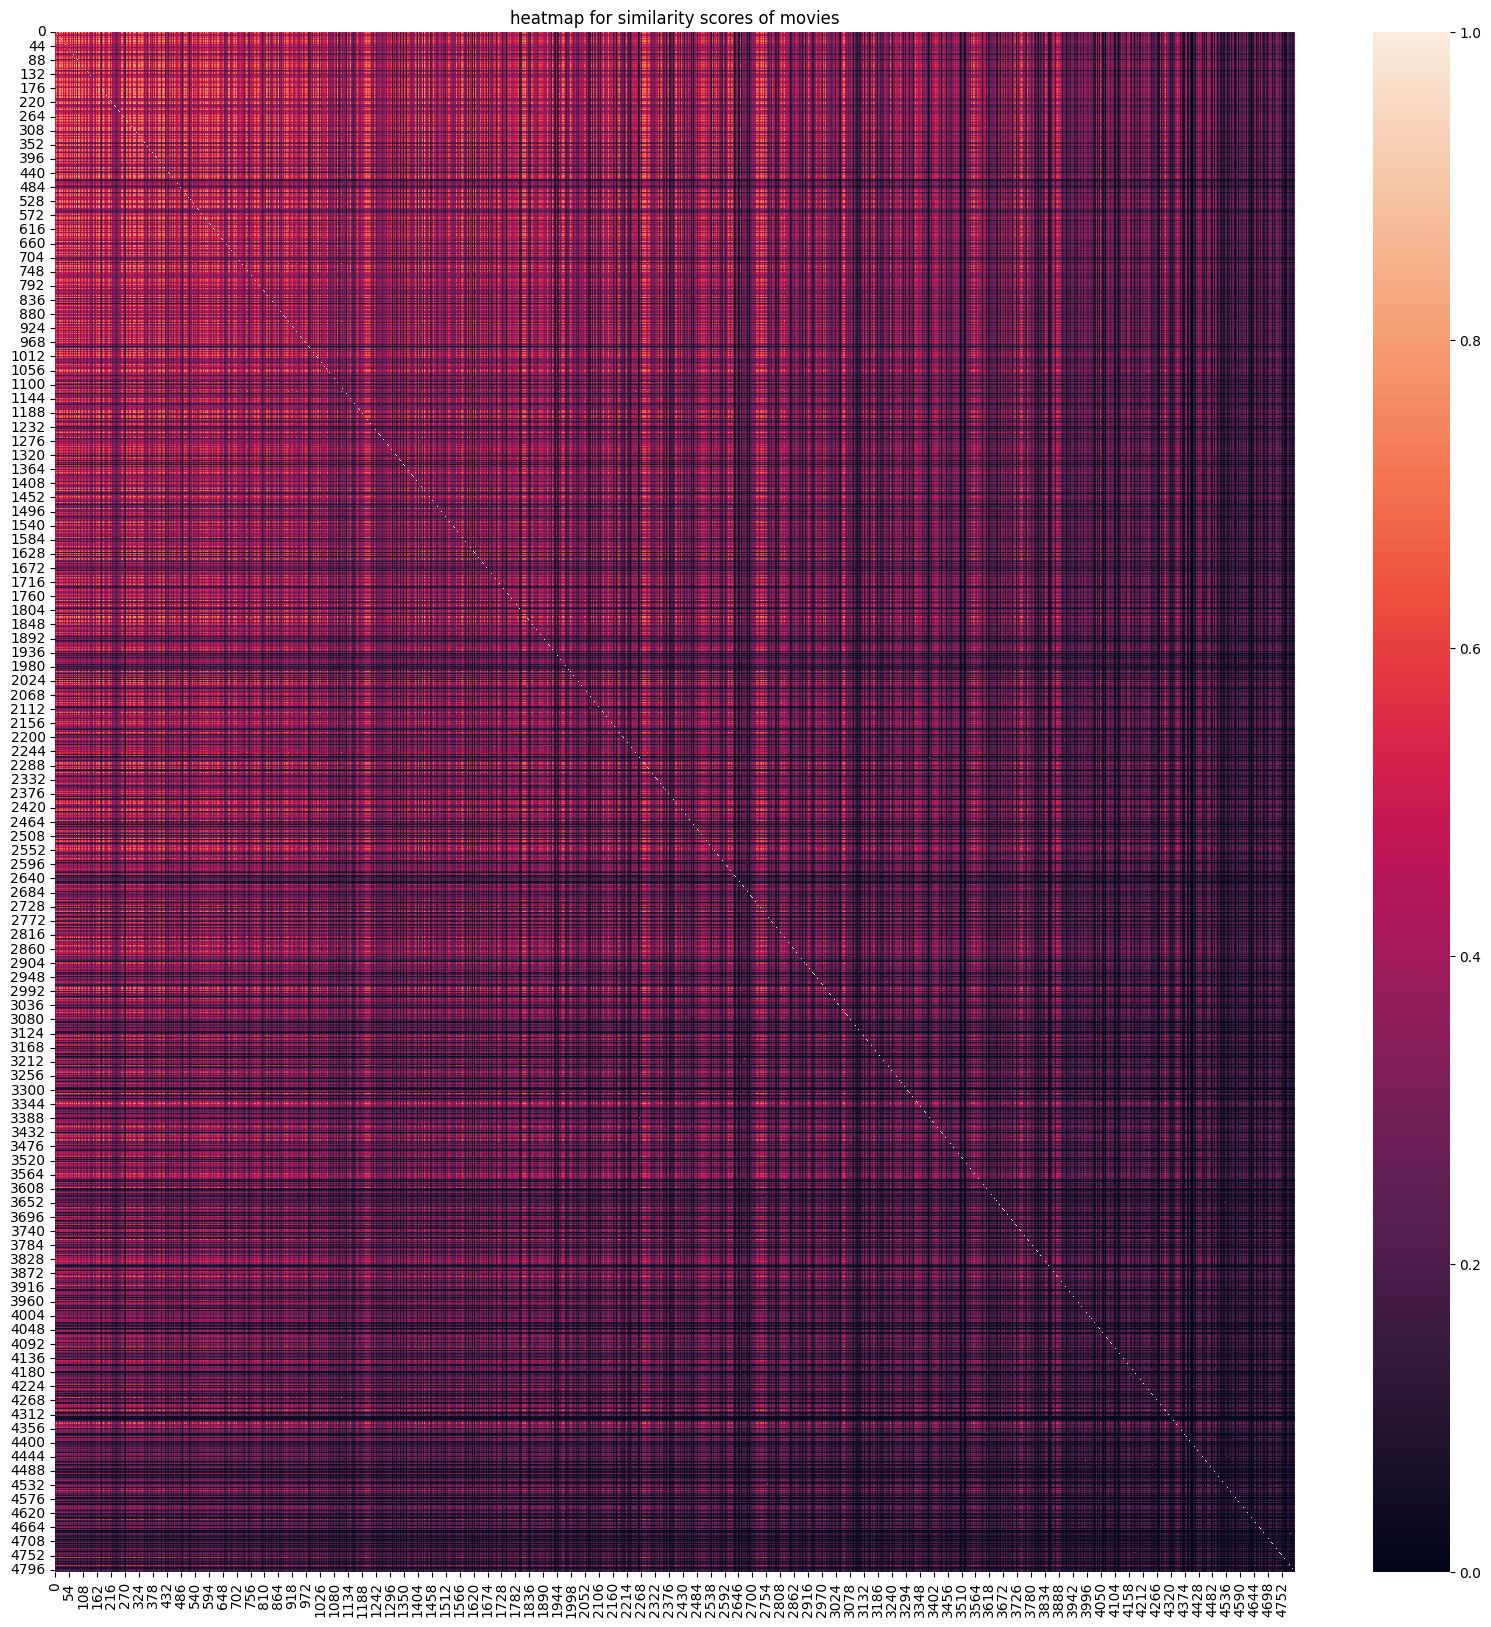

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(similarity)
plt.title('heatmap for similarity scores of movies')


### Recommending similar movies
now we will take input from the user and process it in such a way that the recommendation system is able to give the list of similar movies.

This process involves:
1. Taking Input from the user.
2. Processing the input
    * using difflib to get similar matches of the entered movie by the user.
3. using the similarity scores and finding the similar movies to the movie entered by the user

In [19]:
# taking input from the user

movie_name=input('Enter the name of the movie: ')

Enter the name of the movie: john carter


In [20]:
# processing the user input
''' This step is crucial as the user might make some typos or mistakes while entering the movie name,
so difflib helps to find close matches to the user entered input'''

# creating a list of all the movie titles
titles=df_movies['title'].tolist()
titles[0:10]

['Avatar',
 "Pirates of the Caribbean: At World's End",
 'Spectre',
 'The Dark Knight Rises',
 'John Carter',
 'Spider-Man 3',
 'Tangled',
 'Avengers: Age of Ultron',
 'Harry Potter and the Half-Blood Prince',
 'Batman v Superman: Dawn of Justice']

In [21]:
# now we find the movie entered by the user in the list 
''' for thsi we use the get_close_matches method of the difflib library'''

similar_titles=difflib.get_close_matches(movie_name, titles)
similar_titles

['John Carter', 'Songcatcher', 'Coach Carter']

In [22]:
# the first element in the list of similar_titles is the movie
similar_titles[0]

'John Carter'

In [23]:
# getting the index of the movie John Carter from df_movies
index=df_movies.loc[df_movies['title']=='John Carter']['index']
index

4    4
Name: index, dtype: int64

#### now we get the 4th index row from similarity as it reperesents similarity of movie 'John Carter' to all other movies in the df

In [24]:
similar=similarity[4]

#### using the enumerate feature to see what index of movies have what similarity

In [25]:
similar_movies=list(enumerate(similar))
similar_movies[:10]

[(0, 0.7479591367642205),
 (1, 0.5889746121013806),
 (2, 0.7709202843312678),
 (3, 0.7933476200016509),
 (4, 1.0000000000000009),
 (5, 0.6629662059626836),
 (6, 0.6116849437605995),
 (7, 0.7053556494043408),
 (8, 0.5731392795396822),
 (9, 0.7671984791484021)]

#### as we can see now we have the similarity scores and the movie index (movie index, similarity score). The next step is to order these in desending order in terms of similarity scores as the greater the similarity score the better.

In [26]:
similar_movies.sort(reverse=True,key=lambda x:x[1])

In [27]:
similar_movies[0:5]

[(4, 1.0000000000000009),
 (223, 0.8123334616229856),
 (182, 0.8026675200877186),
 (365, 0.7938356941898703),
 (185, 0.7937616665779132)]

#### we can now get the top 10 movie recommendations based on the movie entered beforehand


In [28]:
for i in range(0,10):
    movie=df_movies.loc[df_movies['index']==similar_movies[i][0]]['title'].values
    print(i+1,'. ', movie[0])

1 .  John Carter
2 .  The Chronicles of Riddick
3 .  Ant-Man
4 .  Contact
5 .  War of the Worlds
6 .  Alexander
7 .  The Dark Knight Rises
8 .  Jurassic World
9 .  Minority Report
10 .  Bad Boys II


### --------------------------------------------------------------------------------------------------------
### *6. Popularity based recommendation system*
Popularity-based movie recommendation systems are a type of recommendation system that suggest movies to users based on a simple formula of how popular a movie was among all the users. This formula can be based on the average rating, the upvotes and the downvotes and also the reviews.

Since this is a popularity based recommendation system, there is no use of taking all of the columns of the dataframe under consideration. We will thus use some selected features for making our predictions.

In [29]:
df_movies.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

#### Here we can see that there are only some columns that we can use for popularity baseed recommendation system
1. popularity
2. vote_average
3. vote_count

So let us create a new dataframe for these specific columns

In [30]:
df_popular=df_movies[['index','original_title','popularity','vote_average', 'vote_count']]
df_popular.head()

index                            original_title  popularity  vote_average  \
0      0                                    Avatar  150.437577           7.2   
1      1  Pirates of the Caribbean: At World's End  139.082615           6.9   
2      2                                   Spectre  107.376788           6.3   
3      3                     The Dark Knight Rises  112.312950           7.6   
4      4                               John Carter   43.926995           6.1   

   vote_count  
0       11800  
1        4500  
2        4466  
3        9106  
4        2124

In [31]:
df_popular.describe()

index   popularity  vote_average    vote_count
count  4803.000000  4803.000000   4803.000000   4803.000000
mean   2401.000000    21.492301      6.092172    690.217989
std    1386.651002    31.816650      1.194612   1234.585891
min       0.000000     0.000000      0.000000      0.000000
25%    1200.500000     4.668070      5.600000     54.000000
50%    2401.000000    12.921594      6.200000    235.000000
75%    3601.500000    28.313505      6.800000    737.000000
max    4802.000000   875.581305     10.000000  13752.000000

### We will set the criteria for popular movies as follows:
1. Only movies  with vote_count greater than 100
2. Only movies that have a rating of 8 and above
3. Only movies that have higher popularity.

In [32]:
# selecting the movies with vote count over 500 and rating over 8
filter1=(df_popular['vote_count']>=100) & (df_popular['vote_average']>=8)
df_popular_filt=df_popular.loc[filter1]
df_popular_filt.head()

index                                     original_title  popularity  \
65      65                                    The Dark Knight  187.322927   
77      77                                         Inside Out  128.655964   
95      95                                       Interstellar  724.247784   
96      96                                          Inception  167.583710   
262    262  The Lord of the Rings: The Fellowship of the Ring  138.049577   

     vote_average  vote_count  
65            8.2       12002  
77            8.0        6560  
95            8.1       10867  
96            8.1       13752  
262           8.0        8705

In [33]:
df_popular_filt.shape

(59, 5)

#### Here we can see that there are 69 movies that satisfy the criteria of vote count over 100 and average ratings over or equal to 8. Now we will select the top 10 popular movies from this data.

In [34]:
df_popular_filt=df_popular_filt.sort_values('popularity', ascending=False)
df_popular_10=df_popular_filt[0:10]
df_popular_10

index                                     original_title  popularity  \
95       95                                       Interstellar  724.247784   
3865   3865                                           Whiplash  192.528841   
65       65                                    The Dark Knight  187.322927   
96       96                                          Inception  167.583710   
662     662                                         Fight Club  146.757391   
2522   2522                                 The Imitation Game  145.364591   
3337   3337                                      The Godfather  143.659698   
809     809                                       Forrest Gump  138.133331   
262     262  The Lord of the Rings: The Fellowship of the Ring  138.049577   
1881   1881                           The Shawshank Redemption  136.747729   

      vote_average  vote_count  
95             8.1       10867  
3865           8.3        4254  
65             8.2       12002  
96             8.1       13752  
662            8.3        9413  
2522           8.0        5723  
3337           8.4        5893  
809            8.2        7927  
262            8.0        8705  
1881           8.5        8205

### I also tried making this popularity based recommender system using the  IMDB's weighted rating formula:
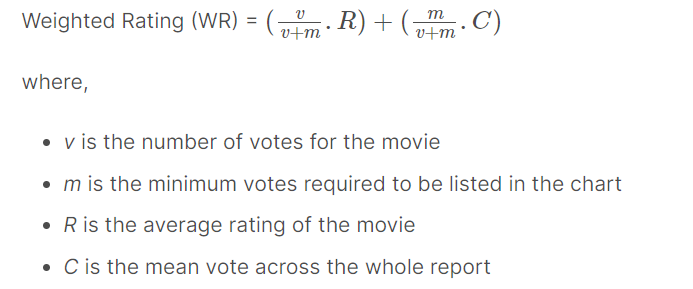

For the sake of correctness we take the 85 uqantile of the total votes as the minimum number of votes requreied to qualify as a popular movie

In [35]:
# initializing the variable m
m=df_popular['vote_count'].quantile(0.85)
m

1300.6999999999998

In [36]:
# calculating the mean vote across the whole report
C=df_popular['vote_average'].mean()
C

6.092171559442016

In [37]:
v=df_popular['vote_count']
R=df_popular['vote_average']

In [38]:
# finding the weighted rating using the IMDB formula
df_popular['wr']=(((v*R)/(v+m))+((m*C)/(v+m)))

C:\Users\revab\AppData\Local\Temp\ipykernel_9188\922461796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_popular['wr']=(((v*R)/(v+m))+((m*C)/(v+m)))


In [39]:
df_popular.head()

index                            original_title  popularity  vote_average  \
0      0                                    Avatar  150.437577           7.2   
1      1  Pirates of the Caribbean: At World's End  139.082615           6.9   
2      2                                   Spectre  107.376788           6.3   
3      3                     The Dark Knight Rises  112.312950           7.6   
4      4                               John Carter   43.926995           6.1   

   vote_count        wr  
0       11800  7.090010  
1        4500  6.718859  
2        4466  6.253124  
3        9106  7.411541  
4        2124  6.097027

In [40]:
# sorting the dataframe
df_popular=df_popular.sort_values('wr', ascending=False)
df_popular.head()

index            original_title  popularity  vote_average  vote_count  \
1881   1881  The Shawshank Redemption  136.747729           8.5        8205   
662     662                Fight Club  146.757391           8.3        9413   
3232   3232              Pulp Fiction  121.463076           8.3        8428   
65       65           The Dark Knight  187.322927           8.2       12002   
3337   3337             The Godfather  143.659698           8.4        5893   

            wr  
1881  8.170528  
662   8.031958  
3232  8.004820  
65    7.993903  
3337  7.982719

#### Now according to the given dataframe the top 10 rows are the mosat popular movies based on the ceriteria of weighted ratings formula.

In [41]:
df_popular_wr_10=df_popular[0:10]
df_popular_wr_10

index                                 original_title  popularity  \
1881   1881                       The Shawshank Redemption  136.747729   
662     662                                     Fight Club  146.757391   
3232   3232                                   Pulp Fiction  121.463076   
65       65                                The Dark Knight  187.322927   
3337   3337                                  The Godfather  143.659698   
96       96                                      Inception  167.583710   
809     809                                   Forrest Gump  138.133331   
95       95                                   Interstellar  724.247784   
329     329  The Lord of the Rings: The Return of the King  123.630332   
1990   1990                        The Empire Strikes Back   78.517830   

      vote_average  vote_count        wr  
1881           8.5        8205  8.170528  
662            8.3        9413  8.031958  
3232           8.3        8428  8.004820  
65             8.2       12002  7.993903  
3337           8.4        5893  7.982719  
96             8.1       13752  7.926504  
809            8.2        7927  7.902889  
95             8.1       10867  7.885368  
329            8.1        8064  7.821125  
1990           8.2        5879  7.818138

#### This gives us a much more accurate recommendation based on the popularity of the movie.

As we can see in this recommendation method *The Shawshank Redemption*, *Fight Club* and *Pulp Fiction* are one of the most popular movies.

### --------------------------------------------------------------------------------------------------------
### *8. Conclusion*
This Jupyter Notebook project developed and compared three types of recommendation systems: content-based and popularity-based
The content-based recommendation system is based on the similarity between items, whereas the popularity-based system recommends items that are popular among all users.
The implementation of these systems involved importing the necessary dependencies and relevant datasets, exploring and preprocessing the data, and developing the three systems. The collaborative filtering system was found to be the most effective.

This project showcases the importance of selecting the appropriate recommendation system for a given dataset and provides a valuable demonstration of the development and comparison of different recommendation systems.


### --------------------------------------------------------------------------------------------------------
### *9. Credits*

*Reva Bharara*

*Email : revabharara@gmail.com*

*Linkedin : https://www.linkedin.com/in/reva-bharara-a83a78241/*